[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

手写数字为： 0


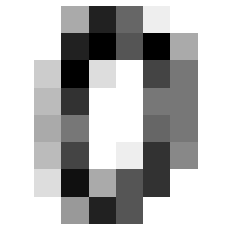

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets

# 导入数据集合
digits = datasets.load_digits()
digital = digits.images[0]
label = digits.target[0]

#显示数字的矩阵形式
print(digital)
#显示数字的图片形式
print("\n手写数字为：", label)
plt.axis('off')
plt.imshow(digital, cmap = plt.get_cmap('gray_r'))
plt.show() 

In [ ]:
# 机器学习算法分类
# 1. 监督学习：所有的监督学习基本都是分类的代名词
# 2. 非监督学习：本质上是聚类的近义词,比如K均值据类(K-Means Clustering),c层次聚类,主成分分析(PCA)等
# 3. 半监督学习：以标签化的分类信息,通过据类思想将未知事物归类为已知事物,如半监督支持向量机,半监督聚类等

In [3]:
# 性能评估
# 1.过拟合和欠拟合
# 2.二分类的混淆矩阵：TP FP TN FN 查全率(R) = TP / TP + FN    查准率(P) = TP / TP + FP
# 3.F1分数：F1 = 2 * (P * R) / (P + R) 
# 4.P-R曲线：平衡点(BEP)
# 5.ROC曲线: FPR = FP / N    TPR = TP / P
# 6.AUC:沿ROC曲线的横轴做积分,通常取值0.5-1,AUC越大表明分类器性能越好

In [4]:
# sklearn
# 1.流程
# 1.1数据处理,如归一化,标准化,正则化,属性缩放,特征编码,插补缺失值,生成多项式特征
# 1.2分割数据,训练集 验证集(可选),测试集
# 1.3训练模型,选取特征构建模型
# 1.4验证模型
# 1.5测试模型
# 1.6使用模型
# 1.7模型调优

# 2. 功能分类：
# 2.1分类(定性输出)：SVM,Logistic回归,随机森林,决策树,多层感知器(MLP)等 
# 2.2回归(定量输出)：线性回归,SVR,Lasso回归,贝叶斯回归等
# 2.3聚类：k均值聚类,谱聚类,均值飘移等 
# 2.4数据降维：PCA,特征选择,非矩阵分解等
# 2.5模型选择：模型度量(metrics),网格搜索(grid search),交叉验证(cross validation) 
# 2.6数据预处理：数据预处理(preprocessing),特征抽取(feature extraction)

In [6]:
# 1. 线性回归
import sklearn
sklearn.__version__

'1.0.2'